<a href="https://colab.research.google.com/github/nv-hiep/ML/blob/main/Multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Data

In [ ]:
df = pd.read_csv('Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


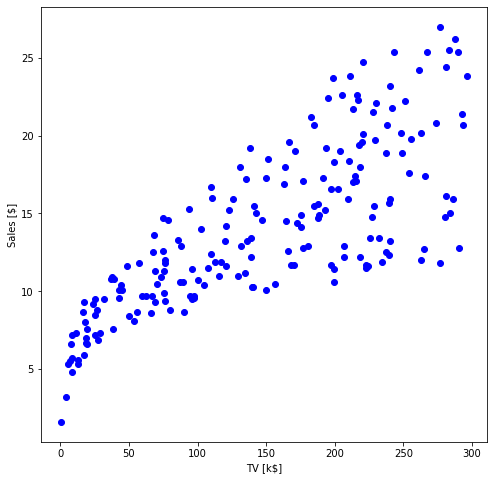

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(df['TV'], df['sales'], c='b')
plt.xlabel('TV [k$]')
plt.ylabel('Sales [$]')
plt.show()

Not really a linear correlation, but that's fine. We'll try a linear regression model.

In [ ]:
X = df['TV'].values.reshape(-1, 1)
y = df['sales'].values.reshape(-1, 1)

print(X.shape)
print(y.shape)

linreg = LinearRegression()
linreg.fit(X, y)
print(linreg.score(X,y))
print('Intercept: ', linreg.intercept_)
print('Coefficient: ', linreg.coef_)
print(f"Sales = {linreg.intercept_[0]} + {linreg.coef_[0][0]} * TV")

(200, 1)
(200, 1)
0.611875050850071
Intercept:  [7.03259355]
Coefficient:  [[0.04753664]]
Sales = 7.032593549127695 + 0.04753664043301975 * TV


In [ ]:
pred = linreg.predict(X)
pred.shape

(200, 1)

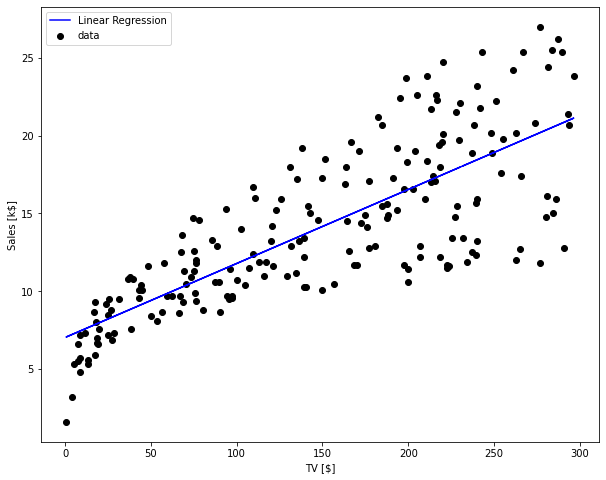

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(X, y, c='k', label='data')
plt.plot(X, pred, 'b-', label='Linear Regression')
plt.xlabel('TV [$]')
plt.ylabel('Sales [k$]')
plt.legend(loc='upper left')
plt.show()

Assess quality of the model.

sm.add_constants(): OLS (Ordinary Least Squares regression) requires the input to have a column of ones. We need to add this column manually. x = sm.add_constant(x1).

In [ ]:
X = df['TV']
y = df['sales']

exog = sm.add_constant(X)
est = sm.OLS(y, exog).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 08 Jan 2022   Prob (F-statistic):           1.47e-42
Time:                        16:33:19   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared = 0.612, not very good, the sales-TV correlation can explain for 60\%  of the varibility.

F-statistic = 312.1, much larger than 1 => Our model is kind of good.

p-values are ~0 (<0.05) => Our features are relevant in this model.

# Multiple linear regression

In [ ]:
Xs = df.drop(['sales'], axis=1)
y = df['sales'].values.reshape(-1, 1)

print(Xs.shape)
print(y.shape)

linreg = LinearRegression()
linreg.fit(Xs, y)
print(linreg.score(Xs,y))
print('Intercept: ', linreg.intercept_)
print('Coefficient: ', linreg.coef_)
print(f"Sales = {linreg.intercept_[0]} + {linreg.coef_[0][0]} * TV + {linreg.coef_[0][1]} * Radio + {linreg.coef_[0][2]} * Newspaper")

(200, 3)
(200, 1)
0.8972106381789522
Intercept:  [2.93888937]
Coefficient:  [[ 0.04576465  0.18853002 -0.00103749]]
Sales = 2.938889369459412 + 0.0457646454553976 * TV + 0.18853001691820448 * Radio + -0.0010374930424763285 * Newspaper


In [ ]:
X = np.column_stack( (df['TV'], df['radio'], df['newspaper']) )
y = df['sales'].values.reshape(-1,1)

exog = sm.add_constant(X)
est = sm.OLS(y, exog).fit()

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 08 Jan 2022   Prob (F-statistic):           1.58e-96
Time:                        16:42:52   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
x1             0.0458      0.001     32.809      0.000       0.043       0.049
x2             0.1885      0.009     21.893      0.000       0.172       0.206
x3            -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared = 0.897, the model can explain for 90\% of the sales' varibility.

F-statistic = 570.3, larger than before and much larger than 1 => Our model is actually pretty good.

The p-values for newspaper parameter is 0.860, much larger than 0.05. => Newspaper is not a relevant coefficient for our model. Maybe, we should take it out.